In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iqbalmaulana/indonesian-news-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/iqbalmaulana/indonesian-news-dataset/versions/1


# EDA

In [33]:
print(os.listdir(path))

['data.csv']


In [34]:
csv_path = os.path.join(path, 'data.csv')

In [35]:
df = pd.read_csv(csv_path)

In [36]:
print(df.head)

<bound method NDFrame.head of           id    source                                              title  \
0         83     tempo  Depo Plumpang Terbakar, Anggota DPR Minta Pert...   
1         84     tempo  Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...   
2         85     tempo  HNW Mendukung Jamaah Umroh First Travel Dapatk...   
3         86     tempo  Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...   
4         87     tempo  Bamsoet Ajak Komunitas Otomotif Kembangkan Per...   
...      ...       ...                                                ...   
32730  63563  kumparan  5 Hewan Aneh yang Hidup di Palung Mariana, Sal...   
32731  63564  kumparan  Biadab! Guru SD di Banyuwangi Cabuli Siswinya,...   
32732  63565  kumparan  Aji Santoso: Jakmania Perlakukan Persebaya den...   
32733  63566  kumparan  Sopir Audi Cium Kaki Ibu & Istri Hamil Usai Si...   
32734  63567     tempo          Ini Besaran Biaya Haji 2023 per Embarkasi   

                                             

In [37]:
print("\Info Dataset")
print(df.info())

\Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          32735 non-null  int64 
 1   source      32735 non-null  object
 2   title       32735 non-null  object
 3   image       32575 non-null  object
 4   url         32735 non-null  object
 5   content     32294 non-null  object
 6   date        32735 non-null  object
 7   embedding   32735 non-null  object
 8   created_at  32735 non-null  object
 9   updated_at  32735 non-null  object
 10  summary     32725 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB
None


In [38]:
print("\nJumlah data duplikat:", df.duplicated().sum())
print("Jumlah data kosong:\n", df.isnull().sum())


Jumlah data duplikat: 0
Jumlah data kosong:
 id              0
source          0
title           0
image         160
url             0
content       441
date            0
embedding       0
created_at      0
updated_at      0
summary        10
dtype: int64


In [39]:
# Jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Hanya jumlah baris saja
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (32735, 11)
Jumlah baris: 32735


In [40]:
print(df[df['content'].isnull()])

          id         source  \
75     34593   cnnindonesia   
127    10328   cnnindonesia   
305     3654  cnbcindonesia   
319     4623   cnnindonesia   
321    15487  cnbcindonesia   
...      ...            ...   
32460  63285   cnnindonesia   
32462  63287  cnbcindonesia   
32516  63342   cnnindonesia   
32527  63354  cnbcindonesia   
32661  63491  cnbcindonesia   

                                                   title  \
75     FOTO: Demo 212 Tolak Israel, Perppu Ciptaker D...   
127    Jejak Transaksi Janggal Rp300 Triliun yang Diu...   
305    Heroik! Tentara Ukraina Berjuang Sampai Akhir ...   
319    Detik-Detik Mario Aniaya David yang Terekam da...   
321    Respons Latihan Korsel-AS, Korut Tembak Rudal ...   
...                                                  ...   
32460  FOTO: Legenda Pusat Industri Parsel Jalan Haji...   
32462  Mau Lebaran, Masyarakat Serbu Layanan Tukar Ua...   
32516  INFOGRAFIS: Jadwal One Way dan Contra Flow Aru...   
32527     Potret China Siag

## Drop data dengan kolom yang kosong
Data dengan kolom, content, summary, image. Total data yang dihapus ada 611 baris data.

In [41]:
df.dropna(subset=['content'], inplace=True)

In [42]:
df.dropna(subset=['summary'], inplace=True)

In [43]:
df.dropna(subset=['image'], inplace=True)

Cek lagi jumlah data setleah di drop

In [45]:
# Jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Hanya jumlah baris saja
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (32127, 11)
Jumlah baris: 32127


In [46]:
print("\nJumlah data duplikat:", df.duplicated().sum())
print("Jumlah data kosong:\n", df.isnull().sum())


Jumlah data duplikat: 0
Jumlah data kosong:
 id            0
source        0
title         0
image         0
url           0
content       0
date          0
embedding     0
created_at    0
updated_at    0
summary       0
dtype: int64


In [47]:
df = df[:2000]

In [48]:
print("Jumlah baris dan kolom:", df.shape)
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (2000, 11)
Jumlah baris: 2000


In [49]:
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
print("\nStatistik panjang berita:")
print(df['content_length'].describe())


Statistik panjang berita:
count    2000.00000
mean      339.29900
std       155.00366
min        26.00000
25%       243.00000
50%       315.00000
75%       411.25000
max      1312.00000
Name: content_length, dtype: float64


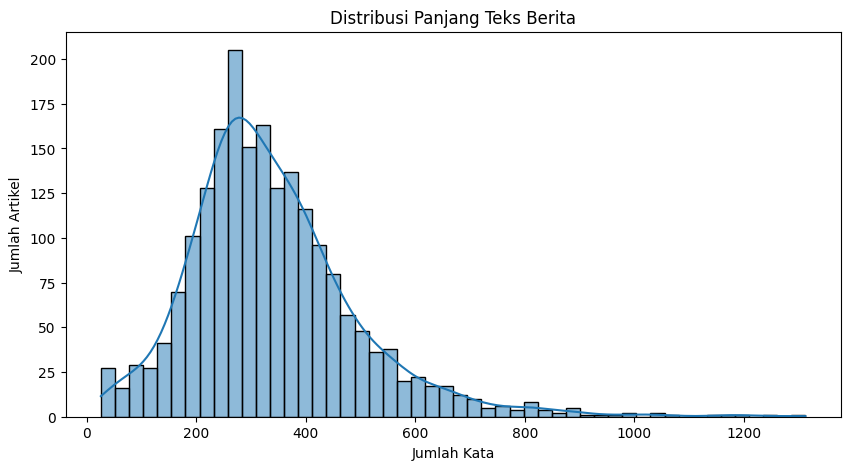

In [50]:
plt.figure(figsize=(10, 5))
sns.histplot(df['content_length'], bins=50, kde=True)
plt.title("Distribusi Panjang Teks Berita")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Artikel")
plt.show()


Jumlah berita per sumber:
 source
tempo            663
cnbcindonesia    431
cnnindonesia     390
kumparan         376
okezone          119
suara             14
jawapos            7
Name: count, dtype: int64


<ipython-input-51-73c228b5c8a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')


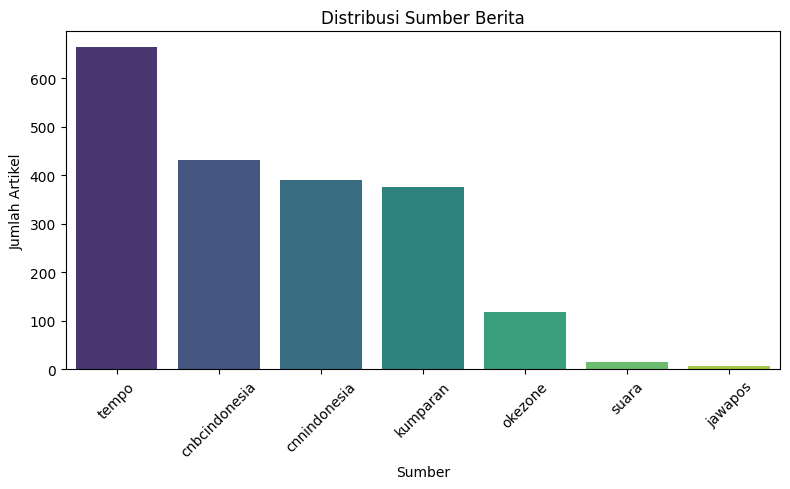

In [51]:
source_counts = df['source'].value_counts()

print("Jumlah berita per sumber:\n", source_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
plt.title('Distribusi Sumber Berita')
plt.xlabel('Sumber')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

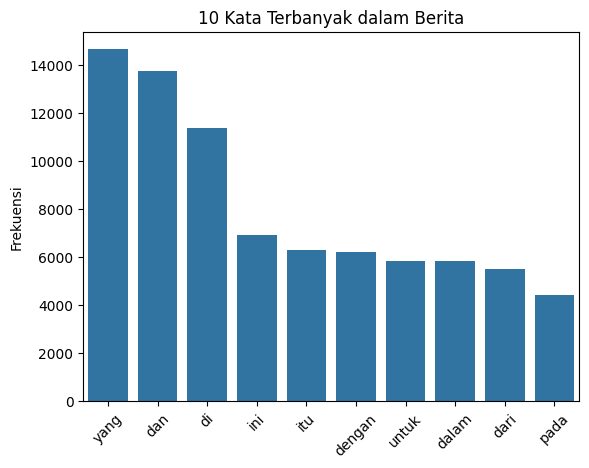

In [52]:
from collections import Counter
import re

all_words = ' '.join(df['content'].dropna()).lower()
all_words = re.findall(r'\b\w+\b', all_words)

word_freq = Counter(all_words).most_common(10)

words, counts = zip(*word_freq)
sns.barplot(x=list(words), y=list(counts))
plt.title("10 Kata Terbanyak dalam Berita")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.show()

# Preprocessing

In [53]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [60]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import RegexpTokenizer

In [55]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
texts = df['content'].astype(str)

In [57]:
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

Fungsi Tokenisasi

In [63]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('indonesian'))
stemmer = StemmerFactory().create_stemmer()

In [64]:
def case_folding(text):
    lowered = text.lower()
    return lowered

In [65]:
def tokenize(text):
    return tokenizer.tokenize(text)

Stopword Removal

In [66]:
def remove_stopwords(tokens):
    removed = [word for word in tokens if word not in stop_words]
    removed_words = [word for word in tokens if word in stop_words]
    return removed, removed_words

Stemming

In [67]:
def stemming(text):
    return stemmer.stem(text)

In [68]:
def preprocess_pipeline(text):
    original = str(text)
    folded = case_folding(original)
    tokens = tokenize(folded)
    cleaned_tokens, removed_tokens = remove_stopwords(tokens)
    cleaned_text = " ".join(cleaned_tokens)
    stemmed_text = stemming(cleaned_text)

    return pd.Series({
        'original': original,
        'case_folding': folded,
        'tokenized': tokens,
        'cleaned_tokens': cleaned_tokens,
        'removed_stopwords': removed_tokens,
        'stemmed': stemmed_text
    })


In [ ]:
processed_df = df['content'].apply(preprocess_pipeline)
df = pd.concat([df, processed_df], axis=1)

In [ ]:
print(df[['original', 'case_folding', 'tokenized', 'cleaned_tokens', 'removed_stopwords', 'stemmed']].

In [ ]:
df.to_csv("berita_preprocessed.csv", index=False)